# Chapter: Feedforward Neural Networks


# Topic: FFNN modeling of Combined Cycle Power Plant

In [8]:
# import required packages
import numpy as np, pandas as pd
import matplotlib.pyplot as plt

In [9]:
# read data
data = pd.read_excel('Folds5x2_pp.xlsx', usecols = 'A:E').values
X = data[:,0:4]
y = data[:,4][:,np.newaxis]

In [10]:
# separate train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [11]:
# scale data
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler()
X_train_scaled = X_scaler.fit_transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [12]:
##%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
##                          Define & Fit FFNN model
## %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

In [13]:
#%% import Keras libraries
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [14]:
# define model
model = Sequential()
model.add(Dense(8, activation='relu', kernel_initializer='he_normal', input_shape=(4,))) # 8 neurons in 1st hidden layer; this hidden layer accepts data from a 4 dimensional input
model.add(Dense(5, activation='relu', kernel_initializer='he_normal')) # 5 neurons in 2nd layer
model.add(Dense(1)) # output layer

In [15]:
# compile model
model.compile(loss='mse', optimizer='Adam') # mean-squared error is to be minimized

In [17]:
# fit model
model.fit(X_train_scaled, y_train_scaled, epochs=25, batch_size=50)

Epoch 1/25
154/154 [==============================] - 0s 576us/step - loss: 1.2850
Epoch 2/25
154/154 [==============================] - 0s 630us/step - loss: 0.2334
Epoch 3/25
154/154 [==============================] - 0s 596us/step - loss: 0.1613
Epoch 4/25
154/154 [==============================] - 0s 568us/step - loss: 0.1303
Epoch 5/25
154/154 [==============================] - 0s 725us/step - loss: 0.1116 0s - loss: 0.11
Epoch 6/25
154/154 [==============================] - 0s 622us/step - loss: 0.0990
Epoch 7/25
154/154 [==============================] - 0s 538us/step - loss: 0.0901
Epoch 8/25
154/154 [==============================] - 0s 499us/step - loss: 0.0825
Epoch 9/25
154/154 [==============================] - 0s 492us/step - loss: 0.0771
Epoch 10/25
154/154 [==============================] - 0s 466us/step - loss: 0.0736
Epoch 11/25
154/154 [==============================] - 0s 479us/step - loss: 0.0714
Epoch 12/25
154/154 [==============================] - 0s 479us/step 

Text(0, 0.5, 'y_test_pred')

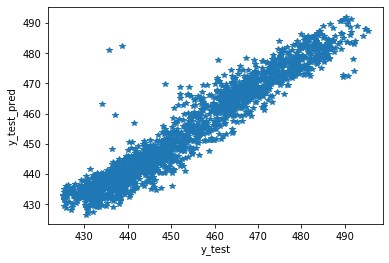

In [18]:
# predict y_test
y_test_scaled_pred = model.predict(X_test_scaled)
y_test_pred = y_scaler.inverse_transform(y_test_scaled_pred)

plt.figure()
plt.plot(y_test, y_test_pred, '*')
plt.xlabel('y_test')
plt.ylabel('y_test_pred')

In [19]:
# metrics
from sklearn.metrics import r2_score
print('R2:', r2_score(y_test, y_test_pred))

R2: 0.9280331811289961


In [20]:
# model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 40        
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 45        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 91
Trainable params: 91
Non-trainable params: 0
_________________________________________________________________
